In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd



def create_combined_heatmap(images):
    # Ensure all images have the same dimensions
    height, width = images[0].shape
    combined_heatmap = np.zeros((height, width), dtype=np.float32)
    
    for img in images:
        combined_heatmap += img.astype(np.float32)*1
    
    # Normalize the combined heatmap
    combined_heatmap /= len(images)
    combined_heatmap = np.clip(combined_heatmap, 0, 255)  # Ensure values are within [0, 255]
    return combined_heatmap


def list_all_files(directory):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            file_list.append(file_path)
    return file_list

## MVTEC

In [ ]:

# category = 'bottle'

# conta_types = os.listdir(f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth')


# # Number of subplots needed
# num_subplots = len(conta_types)

# # Create subplots
# fig, axes = plt.subplots(1, num_subplots, figsize=(15, 5))

# for i, conta_type in enumerate(conta_types):
#     directory_path = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth/{conta_type}'

#     # List all files in the directory
#     all_files = list_all_files(directory_path)

#     # Read all images as grayscale
#     all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in all_files]

#     # Create combined heatmap
#     combined_heatmap = create_combined_heatmap(all_ims)

#     # Display the combined heatmap in the subplot
#     axes[i].imshow(combined_heatmap, cmap='hot')
#     axes[i].axis('off')
#     axes[i].set_title(f'{category} - {conta_type}')

# # Adjust layout
# plt.tight_layout()
# plt.show()


In [ ]:
with open('/home/bule/projects/UTRAD/configurations/mvtec.json', 'r') as file:
    anocats = json.load(file)


categories =['carpet', 'grid', 'leather','tile', 'wood','bottle', 'cable', 'capsule','hazelnut', 'metal_nut', 'pill', 'screw',    'toothbrush', 'transistor' ,'zipper']
# categories = anocats['anomaly_categories']

# key_value_pairs = list(categories.items())
# first_two_pairs = key_value_pairs[:5]
# categories = dict(first_two_pairs)
categories=categories[:5]



# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(os.listdir(f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth')) for category in categories) + 1  # +1 for 'good' category

# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(20, 7.5* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    # List all contamination types and add 'good' category
    conta_types = ['good'] + os.listdir(f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth')

    for i, conta_type in enumerate(conta_types):
        if conta_type == 'good':
            example_directory = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/test/good'
            heatmap_directory = None  # No heatmaps for 'good' category
        else:
            example_directory = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/test/{conta_type}'
            heatmap_directory = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth/{conta_type}'

        # List all files in the example directory
        example_files = list_all_files(example_directory)

        # Read the first image as an example (for the upper row)
        example_image_path = example_files[0] if example_files else None
        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
        axes[2 * cat_idx, i].axis('off')
        
        if conta_type == 'good':
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category}}} - {conta_type}$', fontsize=15)
        else:
            axes[2 * cat_idx, i].set_title(f'{conta_type}', fontsize=15)

        if heatmap_directory:
            # List all files in the heatmap directory
            heatmap_files = list_all_files(heatmap_directory)

            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_files]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
with open('/home/bule/projects/UTRAD/configurations/mvtec.json', 'r') as file:
    anocats = json.load(file)



categories =['carpet', 'grid', 'leather','tile', 'wood','bottle', 'cable', 'capsule','hazelnut', 'metal_nut', 'pill', 'screw',    'toothbrush', 'transistor' ,'zipper']
# categories = anocats['anomaly_categories']

# key_value_pairs = list(categories.items())
# first_two_pairs = key_value_pairs[:5]
# categories = dict(first_two_pairs)
categories=categories[5:10]


# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(os.listdir(f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth')) for category in categories) + 1  # +1 for 'good' category

# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(20, 6* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    # List all contamination types and add 'good' category
    conta_types = ['good'] + os.listdir(f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth')

    for i, conta_type in enumerate(conta_types):
        if conta_type == 'good':
            example_directory = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/test/good'
            heatmap_directory = None  # No heatmaps for 'good' category
        else:
            example_directory = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/test/{conta_type}'
            heatmap_directory = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth/{conta_type}'

        # List all files in the example directory
        example_files = list_all_files(example_directory)

        # Read the first image as an example (for the upper row)
        example_image_path = example_files[0] if example_files else None
        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
        axes[2 * cat_idx, i].axis('off')
        
        if conta_type == 'good':
            
            if '_' in category:
                category_plot = category.replace('_', ' ')
            else:
                category_plot = category
            
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category_plot}}} - {conta_type}$', fontsize=14)
        else:
            axes[2 * cat_idx, i].set_title(f'{conta_type}', fontsize=14)

        if heatmap_directory:
            # List all files in the heatmap directory
            heatmap_files = list_all_files(heatmap_directory)

            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_files]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
with open('/home/bule/projects/UTRAD/configurations/mvtec.json', 'r') as file:
    anocats = json.load(file)



categories =['carpet', 'grid', 'leather','tile', 'wood','bottle', 'cable', 'capsule','hazelnut', 'metal_nut', 'pill', 'screw',    'toothbrush', 'transistor' ,'zipper']
# categories = anocats['anomaly_categories']

# key_value_pairs = list(categories.items())
# first_two_pairs = key_value_pairs[:5]
# categories = dict(first_two_pairs)
categories=categories[10:]


# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(os.listdir(f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth')) for category in categories) + 1  # +1 for 'good' category

# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(20, 6* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    # List all contamination types and add 'good' category
    conta_types = ['good'] + os.listdir(f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth')

    for i, conta_type in enumerate(conta_types):
        if conta_type == 'good':
            example_directory = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/test/good'
            heatmap_directory = None  # No heatmaps for 'good' category
        else:
            example_directory = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/test/{conta_type}'
            heatmap_directory = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth/{conta_type}'

        # List all files in the example directory
        example_files = list_all_files(example_directory)

        # Read the first image as an example (for the upper row)
        example_image_path = example_files[0] if example_files else None
        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
        axes[2 * cat_idx, i].axis('off')
        
        if conta_type == 'good':
            
            if '_' in category:
                category_plot = category.replace('_', ' ')
            else:
                category_plot = category
            
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category_plot}}} - {conta_type}$', fontsize=14)
        else:
            axes[2 * cat_idx, i].set_title(f'{conta_type}', fontsize=14)

        if heatmap_directory:
            # List all files in the heatmap directory
            heatmap_files = list_all_files(heatmap_directory)

            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_files]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
# # Load anomaly categories from JSON file
# with open('/home/bule/projects/UTRAD/configurations/mvtec.json', 'r') as file:
#     anocats = json.load(file)
# categories = anocats['anomaly_categories']

# # Prepare to plot heatmaps in a grid layout
# num_categories = len(categories)
# num_conta_types = max(len(os.listdir(f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth')) for category in categories)
# fig, axs = plt.subplots(num_categories, num_conta_types, figsize=(2.5 * num_conta_types, 2.5 * num_categories))

# for j, category in enumerate(categories):
#     conta_types = os.listdir(f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth')

#     for i, conta_type in enumerate(conta_types):
#         directory_path = f'/home/bule/projects/datasets/mvtec_anomaly_detection/{category}/ground_truth/{conta_type}'

#         all_files = list_all_files(directory_path)
#         all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in all_files]

#         combined_heatmap = create_combined_heatmap(all_ims)
        
#         if combined_heatmap is not None:
#             axs[j, i].imshow(combined_heatmap)
#             axs[j, i].axis('off')
#             axs[j, i].set_title(f'{category} - {conta_type}')
#         else:
#             axs[j, i].text(0.5, 0.5, 'No images found', horizontalalignment='center', verticalalignment='center', transform=axs[j, i].transAxes)
#             axs[j, i].axis('off')

#     # Turn off axes for columns without data
#     for i in range(len(conta_types), num_conta_types):
#         axs[j, i].axis('off')

# plt.tight_layout()
# plt.show()

# mvtec lodco

In [2]:
import os
import json
import pandas as pd


def get_cats_loco(category):
    base_path = '/home/bule/projects/datasets/mvtec_loco_anomaly_detection/annonations_dataset_ninja'
    goods = [os.path.join(base_path, path) for path in os.listdir(base_path) if category in path and 'good' in path]
    anos = [os.path.join(base_path, path) for path in os.listdir(base_path) if category in path and 'good' not in path]

    path_cat = {}
    for path in anos:
        filename = path.split(category)[1].replace('.json', '')[1:]
        parts = filename.rsplit('_', 1)
        new_filename = '/'.join(parts)
        with open(path, 'r') as file:
            anocats = json.load(file)

        if 'objects' in anocats:
            if len(anocats['objects']) > 1:
                cat = anocats['objects'][0]['classTitle']
            else:
                cat = 'not specified'
        else:
            cat = 'not specified'

        newpath = os.path.join(f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/test', new_filename)

        if 'logical_anomalies' in newpath:
            cat = 'logical, ' + cat
        else:
            cat = 'structural, ' + cat

        path_cat[newpath] = cat

    return pd.DataFrame(list(path_cat.items()), columns=['path', 'category'])

# category = 'splicing_connectors' 

# df = get_cats_loco(category)
# print(df)


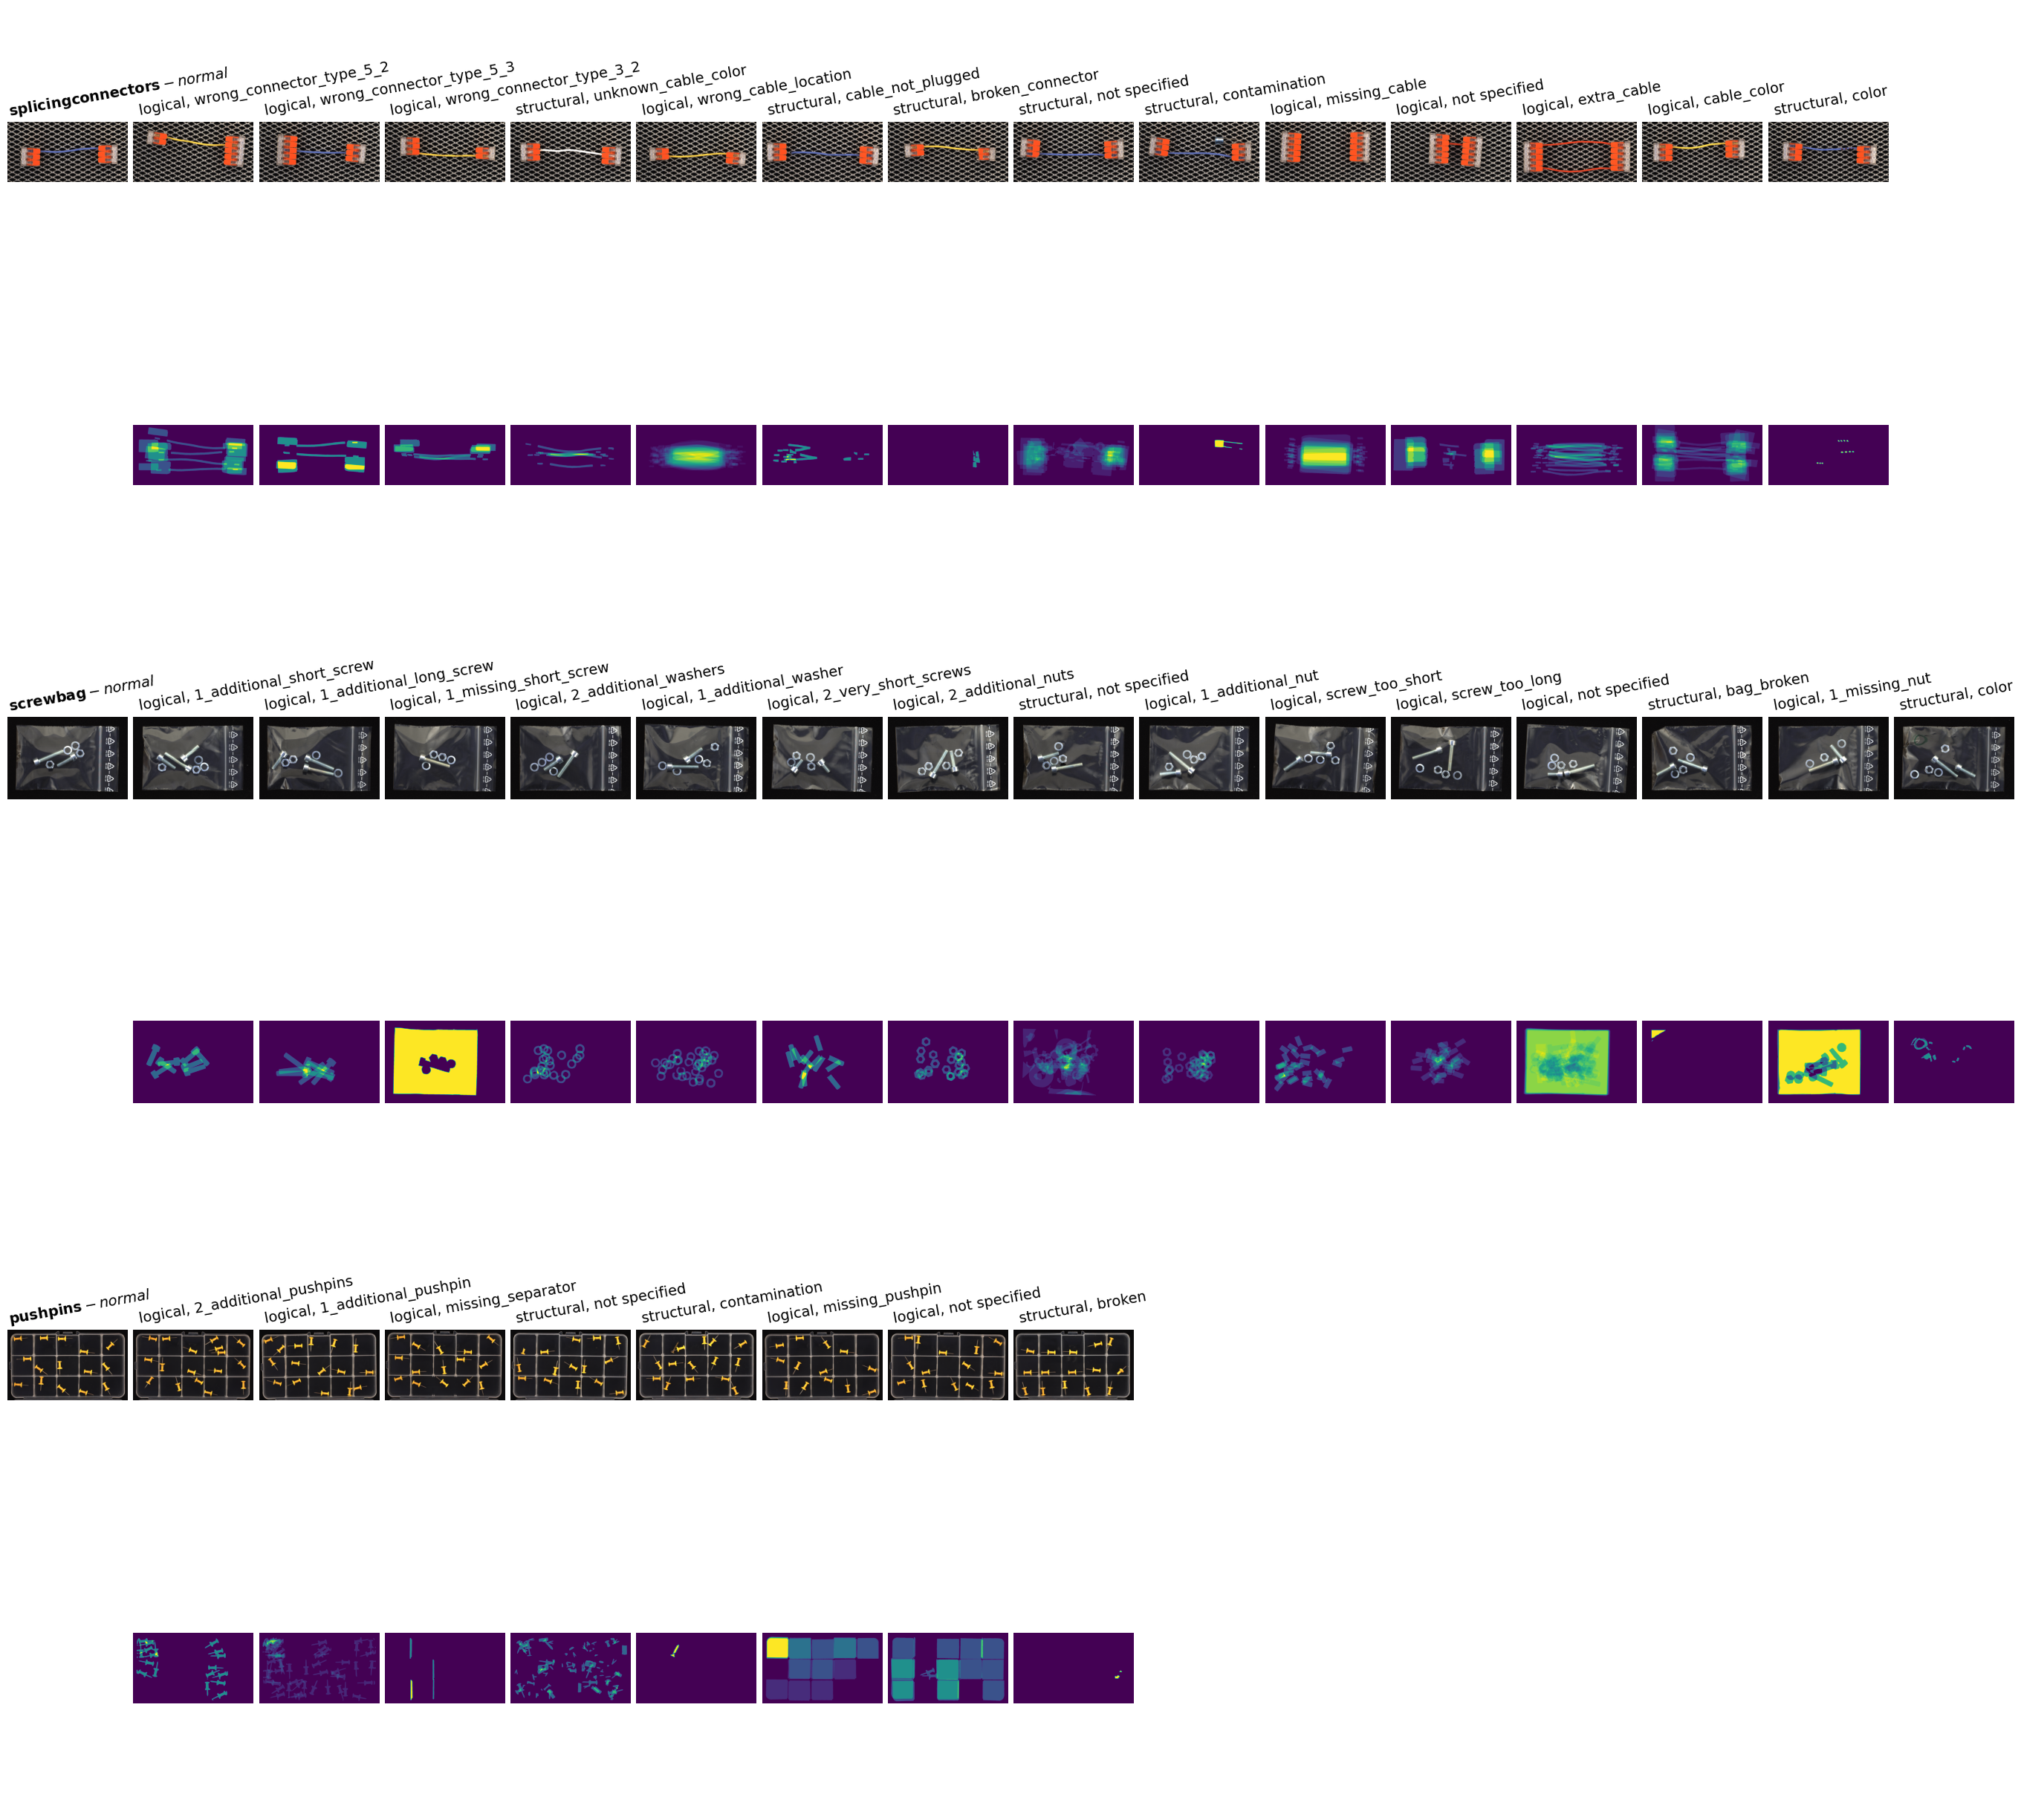

In [14]:
with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    anocats = json.load(file)


categories = anocats['anomaly_categories']

# key_value_pairs = list(categories.items())
# first_two_pairs = key_value_pairs[4:8]
# categories = dict(first_two_pairs)
categories=['breakfast_box','juice_bottle','splicing_connectors','screw_bag','pushpins']
categories=categories[2:]

new_anocats = {}
for category in categories:
    new_anocats[category] =get_cats_loco(category)['category'].unique()
    
    
# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(new_anocats[category]) for category in new_anocats) + 1  # +1 for 'good' category



# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(30, 9* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    
    
    # List all contamination types and add 'good' category

    conta_types = new_anocats[category]
    normal = 'normal'
    rest = [item for item in conta_types if item != normal]
    rest_sorted = sorted(rest, key=len, reverse=True)
    conta_types = np.array([normal] + rest_sorted)

    for i, conta_type in enumerate(conta_types):
        
        if conta_type == 'normal':
            use_heatmap = None  # No heatmaps for 'good' category
            example_images=[f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/test/good/001.png']
            
        else:
            use_heatmap = True
            df=get_cats_loco(category)
            df=df[df['category']==conta_type]
            
            example_images = list(df['path'])
            heatmap_images = [path.replace('test','ground_truth').replace('.png','/000.png')  for path in list(df['path'])]
            
        example_image_path = example_images[0]


        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
            
            
        axes[2 * cat_idx, i].axis('off')
        
    
        
        
        if conta_type == 'normal':
            
            if '_' in category:
                category_plot = category.replace('_', ' ')
            else:
                category_plot = category
            
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category_plot}}} - {conta_type}$', fontsize=14, rotation=10,ha='left')
        else:
            axes[2 * cat_idx, i].set_title(f' {conta_type}', fontsize=14, rotation=10,ha='left')
        
        axes[2 * cat_idx, i].title.set_position((0.0, 1.1))

        if use_heatmap:
            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_images]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.01)
plt.show()

In [ ]:
with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    anocats = json.load(file)


categories = anocats['anomaly_categories']

key_value_pairs = list(categories.items())
first_two_pairs = key_value_pairs[:2]
categories = dict(first_two_pairs)

# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(os.listdir(f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/ground_truth')) for category in categories) + 1  # +1 for 'good' category




# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(20, 12* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    # List all contamination types and add 'good' category
    conta_types = ['good'] + os.listdir(f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/ground_truth')

    for i, conta_type in enumerate(conta_types):
        if conta_type == 'good':
            example_directory = f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/test/good'
            heatmap_directory = None  # No heatmaps for 'good' category
        else:
            example_directory = f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/test/{conta_type}'
            heatmap_directory = f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/ground_truth/{conta_type}'

        # List all files in the example directory
        example_files = list_all_files(example_directory)

        # Read the first image as an example (for the upper row)
        example_image_path = example_files[0] if example_files else None
        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
        axes[2 * cat_idx, i].axis('off')
        
        if conta_type == 'good':
            
            if '_' in category:
                category_plot = category.replace('_', ' ')
            else:
                category_plot = category
            
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category_plot}}} - {conta_type}$', fontsize=16)
        else:
            axes[2 * cat_idx, i].set_title(f'{conta_type}', fontsize=16)

        if heatmap_directory:
            # List all files in the heatmap directory
            heatmap_files = list_all_files(heatmap_directory)

            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_files]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    anocats = json.load(file)


categories = anocats['anomaly_categories']

key_value_pairs = list(categories.items())
first_two_pairs = key_value_pairs[2:]
categories = dict(first_two_pairs)

# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(os.listdir(f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/ground_truth')) for category in categories) + 1  # +1 for 'good' category

# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(15, 8* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    # List all contamination types and add 'good' category
    conta_types = ['good'] + os.listdir(f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/ground_truth')

    for i, conta_type in enumerate(conta_types):
        if conta_type == 'good':
            example_directory = f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/test/good'
            heatmap_directory = None  # No heatmaps for 'good' category
        else:
            example_directory = f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/test/{conta_type}'
            heatmap_directory = f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/ground_truth/{conta_type}'

        # List all files in the example directory
        example_files = list_all_files(example_directory)

        # Read the first image as an example (for the upper row)
        example_image_path = example_files[0] if example_files else None
        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
        axes[2 * cat_idx, i].axis('off')
        if conta_type == 'good':
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category}}} - {conta_type}$', fontsize=8)
        else:
            axes[2 * cat_idx, i].set_title(f'{conta_type}', fontsize=8)

        if heatmap_directory:
            # List all files in the heatmap directory
            heatmap_files = list_all_files(heatmap_directory)

            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_files]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
# # Load anomaly categories from JSON file
# with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
#     anocats = json.load(file)
# categories = anocats['anomaly_categories']

# # Prepare to plot heatmaps in a grid layout
# num_categories = len(categories)
# num_conta_types = max(len(os.listdir(f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/ground_truth')) for category in categories)
# fig, axs = plt.subplots(num_categories, num_conta_types, figsize=(5 * num_conta_types, 5 * num_categories))

# for j, category in enumerate(categories):
#     conta_types = os.listdir(f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/ground_truth')

#     for i, conta_type in enumerate(conta_types):
#         directory_path = f'/home/bule/projects/datasets/mvtec_loco_anomaly_detection/{category}/ground_truth/{conta_type}'

#         all_files = list_all_files(directory_path)
#         all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in all_files]

#         combined_heatmap = create_combined_heatmap(all_ims)
        
#         if combined_heatmap is not None:
#             axs[j, i].imshow(combined_heatmap)
#             axs[j, i].axis('off')
#             axs[j, i].set_title(f'{category} - {conta_type}')
#         else:
#             axs[j, i].text(0.5, 0.5, 'No images found', horizontalalignment='center', verticalalignment='center', transform=axs[j, i].transAxes)
#             axs[j, i].axis('off')

#     # Turn off axes for columns without data
#     for i in range(len(conta_types), num_conta_types):
#         axs[j, i].axis('off')

# plt.tight_layout()
# plt.show()

# Beantech

In [ ]:
with open('/home/bule/projects/UTRAD/configurations/beantec.json', 'r') as file:
    anocats = json.load(file)


categories = anocats['anomaly_categories']

key_value_pairs = list(categories.items())
first_two_pairs = key_value_pairs[:]
categories = dict(first_two_pairs)

# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(os.listdir(f'/home/bule/projects/datasets/BTech_Dataset_transformed/{category}/ground_truth')) for category in categories) + 1  # +1 for 'good' category

# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(10, 12* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    # List all contamination types and add 'good' category
    conta_types = ['ok'] + os.listdir(f'/home/bule/projects/datasets/BTech_Dataset_transformed/{category}/ground_truth')

    for i, conta_type in enumerate(conta_types):
        if conta_type == 'ok':
            example_directory = f'/home/bule/projects/datasets/BTech_Dataset_transformed/{category}/test/ok'
            heatmap_directory = None  # No heatmaps for 'good' category
        else:
            example_directory = f'/home/bule/projects/datasets/BTech_Dataset_transformed/{category}/test/{conta_type}'
            heatmap_directory = f'/home/bule/projects/datasets/BTech_Dataset_transformed/{category}/ground_truth/{conta_type}'

        # List all files in the example directory
        example_files = list_all_files(example_directory)

        # Read the first image as an example (for the upper row)
        example_image_path = example_files[0] if example_files else None
        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
        axes[2 * cat_idx, i].axis('off')
        if conta_type == 'ok':
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category}}} - {conta_type}$', fontsize=14)
        else:
            axes[2 * cat_idx, i].set_title(f'{conta_type}', fontsize=14)

        if heatmap_directory:
            # List all files in the heatmap directory
            heatmap_files = list_all_files(heatmap_directory)

            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_files]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.show()

# ViSa

In [ ]:
categories = anocats['anomaly_categories']
categories.keys()



In [ ]:
with open('/home/bule/projects/UTRAD/configurations/visa.json', 'r') as file:
    anocats = json.load(file)


# categories = anocats['anomaly_categories']

# key_value_pairs = list(categories.items())
# first_two_pairs = key_value_pairs[4:8]
# categories = dict(first_two_pairs)

categories=['candle', 'capsules', 'cashew', 'chewinggum','macaroni2','macaroni1', 'fryum', 'pipe_fryum',   'pcb1', 'pcb2', 'pcb3', 'pcb4']
categories=categories[8:]

new_anocats = {}
for category in categories:
    new_anocats[category] = pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')['label'].unique()
    
    
# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(new_anocats[category]) for category in new_anocats) + 1  # +1 for 'good' category



# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(35, 4* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    
    
    # List all contamination types and add 'good' category

    conta_types = new_anocats[category]
    normal = 'normal'
    rest = [item for item in conta_types if item != normal]
    rest_sorted = sorted(rest, key=len, reverse=True)
    conta_types = np.array([normal] + rest_sorted)

    for i, conta_type in enumerate(conta_types):
        
        if conta_type == 'normal':
            use_heatmap = None  # No heatmaps for 'good' category
            data=pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')
            example_images = list(data[data['label']=='normal']['image'])
            
        else:
            use_heatmap = True
            data=pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')
                
            example_images = list(data[data['label']==f'{conta_type}']['image'])
            
            
            heatmap_images = list(data[data['label']==f'{conta_type}']['mask'])
            
            
        example_images=[os.path.join('/home/bule/projects/datasets/VisA/',path) for path in example_images]
        example_image_path = example_images[0]


        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
            
            
        axes[2 * cat_idx, i].axis('off')
        
    
        
        
        if conta_type == 'normal':
            
            if '_' in category:
                category_plot = category.replace('_', ' ')
            else:
                category_plot = category
            
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category_plot}}} - {conta_type}$', fontsize=14, rotation=10,ha='left')
        else:
            axes[2 * cat_idx, i].set_title(f' {conta_type}', fontsize=14, rotation=10,ha='left')
        
        axes[2 * cat_idx, i].title.set_position((0.0, 1.1))

        if use_heatmap:
            heatmap_files=[os.path.join('/home/bule/projects/datasets/VisA/',path) for path in heatmap_images]
            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_files]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.01)
plt.show()

In [ ]:
conta_types

In [ ]:
with open('/home/bule/projects/UTRAD/configurations/visa.json', 'r') as file:
    anocats = json.load(file)


categories = anocats['anomaly_categories']

key_value_pairs = list(categories.items())
first_two_pairs = key_value_pairs[3:6]
categories = dict(first_two_pairs)

new_anocats = {}
for category in categories:
    new_anocats[category] = pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')['label'].unique()
    
    
# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(new_anocats[category]) for category in new_anocats) + 1  # +1 for 'good' category



# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(30, 4* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    

    conta_types = new_anocats[category]
    normal = 'normal'
    rest = [item for item in conta_types if item != normal]
    rest_sorted = sorted(rest, key=len, reverse=True)
    conta_types = np.array([normal] + rest_sorted)


    for i, conta_type in enumerate(conta_types):
        
        
        
        
        if conta_type == 'normal':
            use_heatmap = None  # No heatmaps for 'good' category
            data=pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')
            example_images = list(data[data['label']=='normal']['image'])
            
        else:
            use_heatmap = True
            data=pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')
                
            example_images = list(data[data['label']==f'{conta_type}']['image'])
            
            
            heatmap_images = list(data[data['label']==f'{conta_type}']['mask'])
            
            
        example_images=[os.path.join('/home/bule/projects/datasets/VisA/',path) for path in example_images]
        example_image_path = example_images[0]


        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
            
        axes[2 * cat_idx, i].axis('off')    
            
        if conta_type == 'normal':
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category}}} - {conta_type}$', fontsize=8, rotation=10,ha='left')
        else:
            axes[2 * cat_idx, i].set_title(f' {conta_type}', fontsize=8, rotation=10,ha='left')
        
        axes[2 * cat_idx, i].title.set_position((0.0, 1.1))

        if use_heatmap:
            heatmap_files=[os.path.join('/home/bule/projects/datasets/VisA/',path) for path in heatmap_images]
            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_files]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
with open('/home/bule/projects/UTRAD/configurations/visa.json', 'r') as file:
    anocats = json.load(file)


categories = anocats['anomaly_categories']

key_value_pairs = list(categories.items())
first_two_pairs = key_value_pairs[6:9]
categories = dict(first_two_pairs)

new_anocats = {}
for category in categories:
    new_anocats[category] = pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')['label'].unique()
    
    
# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(new_anocats[category]) for category in new_anocats) + 1  # +1 for 'good' category



# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(30, 4* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    
    
    # List all contamination types and add 'good' category
    conta_types = new_anocats[category]
    normal = 'normal'
    rest = [item for item in conta_types if item != normal]
    rest_sorted = sorted(rest, key=len, reverse=True)
    conta_types = np.array([normal] + rest_sorted)

    for i, conta_type in enumerate(conta_types):
        
        if conta_type == 'normal':
            use_heatmap = None  # No heatmaps for 'good' category
            data=pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')
            example_images = list(data[data['label']=='normal']['image'])
            
        else:
            use_heatmap = True
            data=pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')
                
            example_images = list(data[data['label']==f'{conta_type}']['image'])
            
            
            heatmap_images = list(data[data['label']==f'{conta_type}']['mask'])
            
            
        example_images=[os.path.join('/home/bule/projects/datasets/VisA/',path) for path in example_images]
        example_image_path = example_images[0]


        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
            
            
        if conta_type == 'normal':
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category}}} - {conta_type}$', fontsize=8, rotation=10,ha='left')
        else:
            axes[2 * cat_idx, i].set_title(f' {conta_type}', fontsize=8, rotation=10,ha='left')
        
        axes[2 * cat_idx, i].title.set_position((0.0, 1.1))
        axes[2 * cat_idx, i].axis('off')
        if use_heatmap:
            heatmap_files=[os.path.join('/home/bule/projects/datasets/VisA/',path) for path in heatmap_images]
            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_files]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
with open('/home/bule/projects/UTRAD/configurations/visa.json', 'r') as file:
    anocats = json.load(file)


categories = anocats['anomaly_categories']

key_value_pairs = list(categories.items())
first_two_pairs = key_value_pairs[9:]
categories = dict(first_two_pairs)

new_anocats = {}
for category in categories:
    new_anocats[category] = pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')['label'].unique()
    
    
# Calculate the number of rows and columns for the subplots
num_categories = len(categories)
num_columns = max(len(new_anocats[category]) for category in new_anocats) + 1  # +1 for 'good' category



# Create subplots with tighter layout
fig, axes = plt.subplots(2 * num_categories, num_columns, figsize=(30, 4* num_categories), 
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

for cat_idx, category in enumerate(categories):
    
    
    # List all contamination types and add 'good' category
    conta_types = new_anocats[category]
    normal = 'normal'
    rest = [item for item in conta_types if item != normal]
    rest_sorted = sorted(rest, key=len, reverse=True)
    conta_types = np.array([normal] + rest_sorted)

    for i, conta_type in enumerate(conta_types):
        
        if conta_type == 'normal':
            use_heatmap = None  # No heatmaps for 'good' category
            data=pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')
            example_images = list(data[data['label']=='normal']['image'])
            
        else:
            use_heatmap = True
            data=pd.read_csv(f'/home/bule/projects/datasets/VisA/{category}/image_anno.csv')
                
            example_images = list(data[data['label']==f'{conta_type}']['image'])
            
            
            heatmap_images = list(data[data['label']==f'{conta_type}']['mask'])
            
            
        example_images=[os.path.join('/home/bule/projects/datasets/VisA/',path) for path in example_images]
        example_image_path = example_images[0]


        if example_image_path:
            example_image = cv2.imread(example_image_path)
            example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[2 * cat_idx, i].imshow(example_image_rgb)
            
            
        if conta_type == 'normal':
            axes[2 * cat_idx, i].set_title(f'$\mathbf{{{category}}} - {conta_type}$', fontsize=8, rotation=10,ha='left')
        else:
            axes[2 * cat_idx, i].set_title(f' {conta_type}', fontsize=8, rotation=10,ha='left')
        
        axes[2 * cat_idx, i].title.set_position((0.0, 1.1))
        axes[2 * cat_idx, i].axis('off')
        if use_heatmap:
            heatmap_files=[os.path.join('/home/bule/projects/datasets/VisA/',path) for path in heatmap_images]
            # Read all images as grayscale for heatmap (lower row)
            all_ims = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in heatmap_files]

            # Create combined heatmap
            combined_heatmap = create_combined_heatmap(all_ims)

            # Display the combined heatmap in the subplot
            axes[2 * cat_idx + 1, i].imshow(combined_heatmap)
        axes[2 * cat_idx + 1, i].axis('off')

# Hide any empty axes
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout with more precise control
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.show()